In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install download

In [3]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=548765 sha256=d359533b28fea3d8f414b4a751719b9e13c83bbee948dac9bda1b26cf5404346
  Stored in directory: c:\users\karga\appdata\local\pip\cache\wheels\da\a4\bb\dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from download import download


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [5]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

Creating data folder...

file_sizes: 7.96MB [00:03, 2.55MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [6]:
!ls /tmp/aq/PRSA_Data_20130301-20170228

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [8]:
aq_df_sh = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [9]:
aq_df_wa = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [10]:
aq_df_gu = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [11]:
aq_df = pd.concat([aq_df_sh, aq_df_wa,aq_df_gu], ignore_index=True, sort=False)

In [12]:
aq_df.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [13]:
aq_df.tail()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
105187,2017-02-28 19:00:00,35060,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,35061,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,35062,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,35063,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng
105191,2017-02-28 23:00:00,35064,12.0,48.0,5.0,48.0,600.0,28.0,6.2,1010.5,-13.4,0.0,NNE,0.7,Gucheng


In [14]:
aq_df=aq_df.drop('No',axis=1)

In [15]:
aq_df=aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [16]:
aq_df.head()

PM2.5        PM10        SO2        NO2  \
station year_month_day_hour                                                 
Gucheng 2013-03-01             8.625000   16.875000   7.391304  14.250000   
        2013-03-02            36.916667   51.375000  37.291667  37.565217   
        2013-03-03            80.333333  120.041667  47.541667  63.333333   
        2013-03-04            26.500000   51.291667  18.666667  32.666667   
        2013-03-05           136.708333  172.541667  75.130435  73.500000   

                                      CO         O3      TEMP         PRES  \
station year_month_day_hour                                                  
Gucheng 2013-03-01            869.565217  77.130435  1.691667  1024.816667   
        2013-03-02           1479.041667  39.583333  0.820833  1024.900000   
        2013-03-03           2349.708333  33.708333  6.562500  1012.566667   
        2013-03-04           1170.666667  67.250000  9.795833  1015.608333   
        2013-03-05           1381.545455  84.375000  6.750000  1008.883333   

                                  DEWP  RAIN      WSPM  
station year_month_day_hour                             
Gucheng 2013-03-01          -19.691667   0.0  2.350000  
        2013-03-02          -16.337500   0.0  1.087500  
        2013-03-03          -11.991667   0.0  1.400000  
        2013-03-04          -11.945833   0.0  1.541667  
        2013-03-05           -7.741667   0.0  0.841667

In [17]:
aq_df.tail()

PM2.5       PM10        SO2        NO2  \
station year_month_day_hour                                               
Wanliu  2017-02-24           21.458333  39.666667   8.750000  55.875000   
        2017-02-25            8.250000  21.166667   6.375000  36.916667   
        2017-02-26           27.125000  44.583333  14.250000  69.916667   
        2017-02-27           64.000000  95.916667  17.869565  89.826087   
        2017-02-28            9.958333  25.583333   7.458333  40.916667   

                                      CO         O3       TEMP         PRES  \
station year_month_day_hour                                                   
Wanliu  2017-02-24            837.500000  38.583333   4.395833  1019.466667   
        2017-02-25            491.666667  56.375000   6.387500  1017.287500   
        2017-02-26            887.500000  30.250000   6.720833  1018.758333   
        2017-02-27           1643.478261  17.136364   7.220833  1015.554167   
        2017-02-28            479.166667  54.791667  10.516667  1013.345833   

                                  DEWP  RAIN      WSPM  
station year_month_day_hour                             
Wanliu  2017-02-24          -10.583333   0.0  1.262500  
        2017-02-25           -9.900000   0.0  1.466667  
        2017-02-26           -7.558333   0.0  1.562500  
        2017-02-27           -6.333333   0.0  1.316667  
        2017-02-28          -12.266667   0.0  1.800000

In [18]:
aq_df=aq_df.reset_index()

<AxesSubplot:xlabel='year_month_day_hour'>

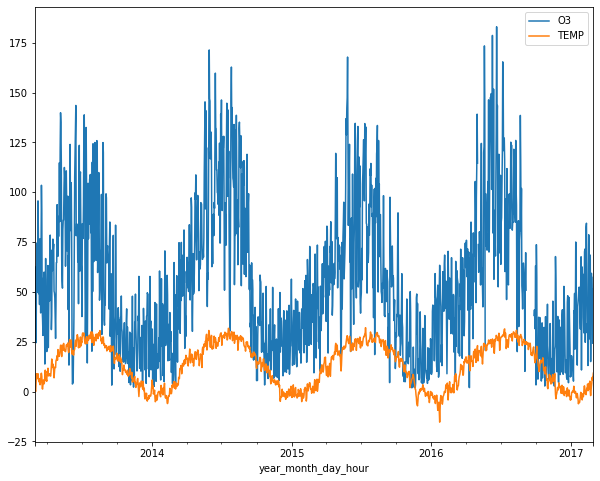

In [19]:
aq_df.set_index('year_month_day_hour').query('station=="Shunyi"')[['O3','TEMP']].plot()

<AxesSubplot:xlabel='year_month_day_hour'>

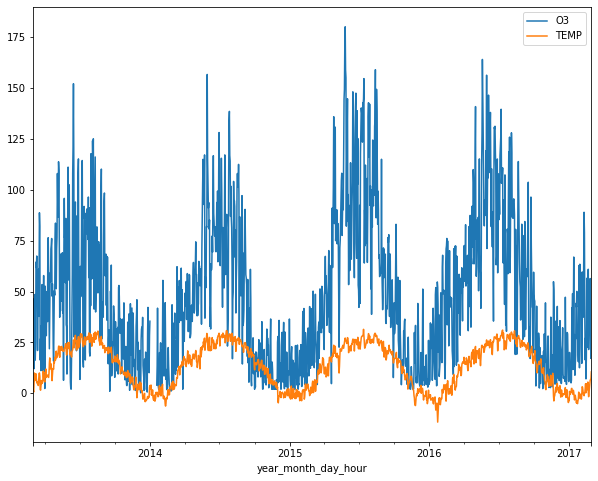

In [20]:
aq_df.set_index('year_month_day_hour').query('station=="Wanliu"')[['O3','TEMP']].plot()

station
Gucheng    AxesSubplot(0.125,0.125;0.775x0.755)
Shunyi     AxesSubplot(0.125,0.125;0.775x0.755)
Wanliu     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

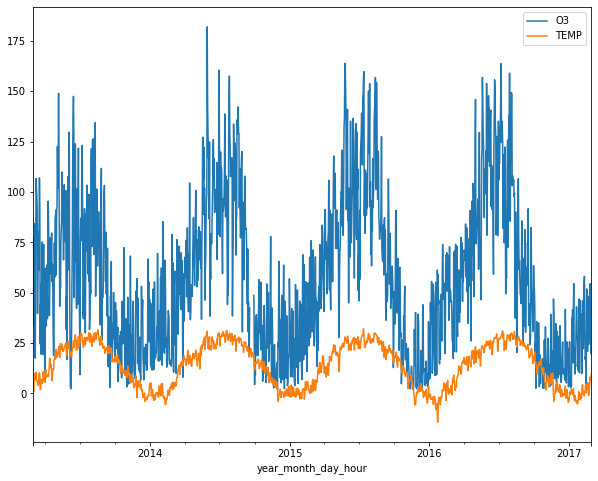

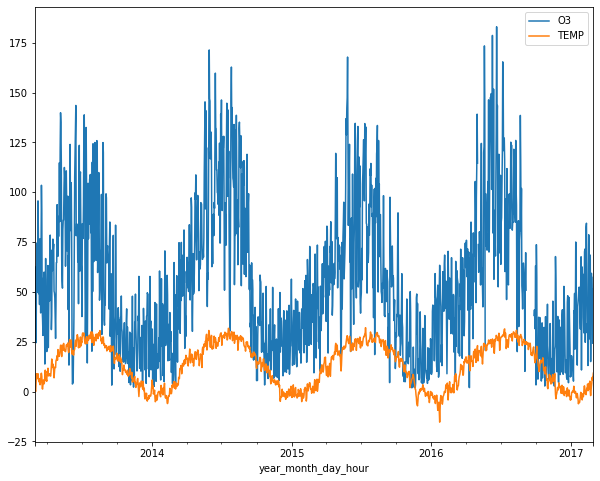

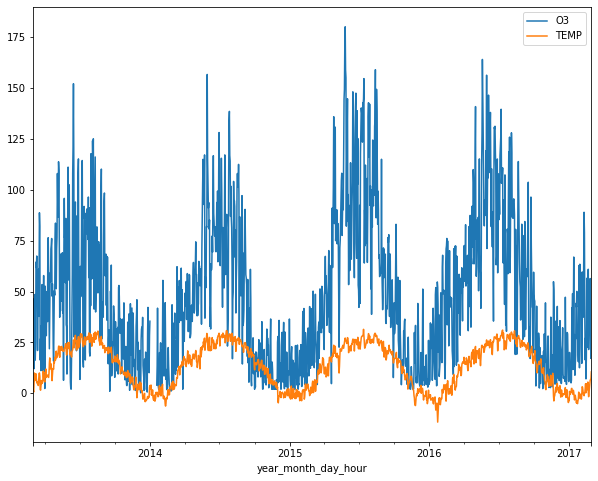

In [21]:
aq_df.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot()

In [22]:
aq_df['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [23]:
aq_df.columns

Index(['station', 'year_month_day_hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

In [24]:
from fbprophet import Prophet

In [25]:
df_final=aq_df[['year_month_day_hour','TEMP','O3','station']].rename({'year_month_day_hour':'ds','O3':'y'},axis='columns')

In [26]:
df_final.head()

,ds,TEMP,y,station
0,2013-03-01,1.691667,77.130435,Gucheng
1,2013-03-02,0.820833,39.583333,Gucheng
2,2013-03-03,6.562500,33.708333,Gucheng
3,2013-03-04,9.795833,67.250000,Gucheng
4,2013-03-05,6.750000,84.375000,Gucheng


In [27]:
stations=df_final.groupby('station')

In [28]:
stations.head()

,ds,TEMP,y,station
0,2013-03-01,1.691667,77.130435,Gucheng
1,2013-03-02,0.820833,39.583333,Gucheng
2,2013-03-03,6.562500,33.708333,Gucheng
3,2013-03-04,9.795833,67.250000,Gucheng
4,2013-03-05,6.750000,84.375000,Gucheng
1461,2013-03-01,0.541667,62.478261,Shunyi
1462,2013-03-02,0.083333,40.416667,Shunyi
1463,2013-03-03,5.029167,24.541667,Shunyi
1464,2013-03-04,8.937500,55.125000,Shunyi
1465,2013-03-05,6.450000,74.541667,Shunyi


In [29]:
for station in stations.groups:
    group = stations.get_group(station)
    train=group[(group['ds'] >= '2013-03-01') & (group['ds'] <= '2016-02-28')]
    test=group[(group['ds'] > '2016-02-28')]

In [30]:
train.shape

(1095, 4)

In [31]:
test.shape

(366, 4)

In [32]:
target=pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


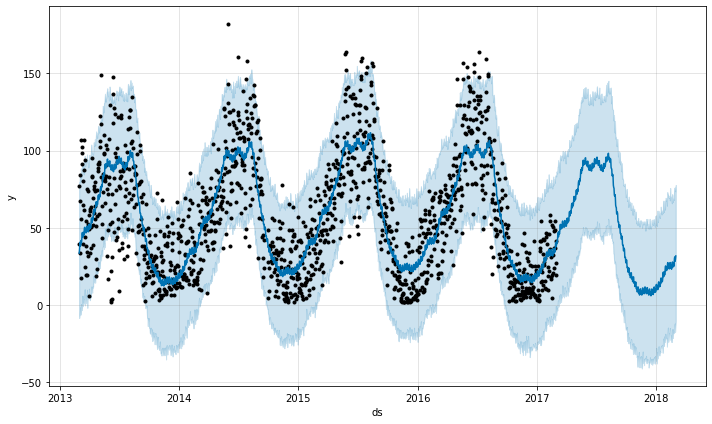

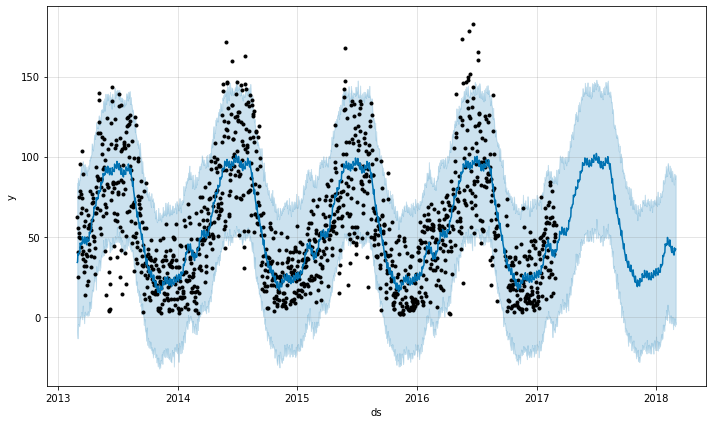

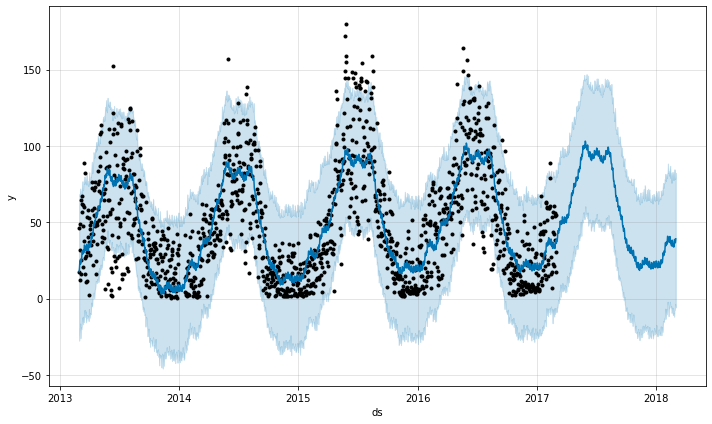

In [33]:
for station in stations.groups:
    group = stations.get_group(station)
    
    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=366)
    forecast = m.predict(future)  
    m.plot(forecast)  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+station})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [34]:
target = target[['yhat_' + station for station in stations.groups.keys()]]

In [35]:
target.head()

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.665538,33.953142,17.708658
2013-03-02,35.742988,34.288243,20.049573
2013-03-03,39.519177,39.448014,23.873412
2013-03-04,40.782311,38.917357,24.388212
2013-03-05,38.165888,38.566933,22.537725


<AxesSubplot:xlabel='ds'>

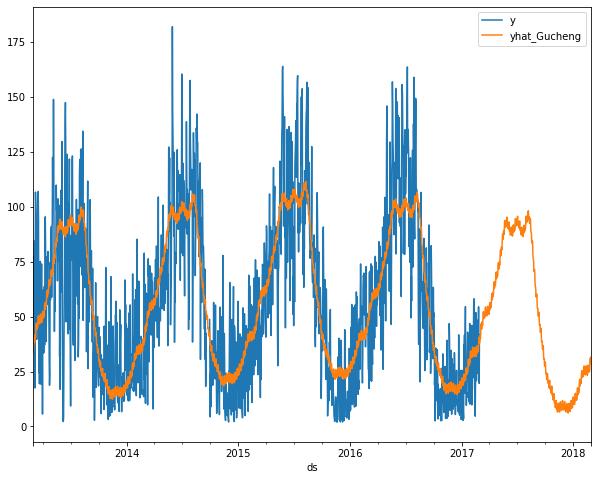

In [36]:
pd.concat([df_final.set_index('ds').query("station=='Gucheng'")['y'],target['yhat_Gucheng']],axis=1).plot()

In [37]:
df_final['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

<AxesSubplot:xlabel='ds'>

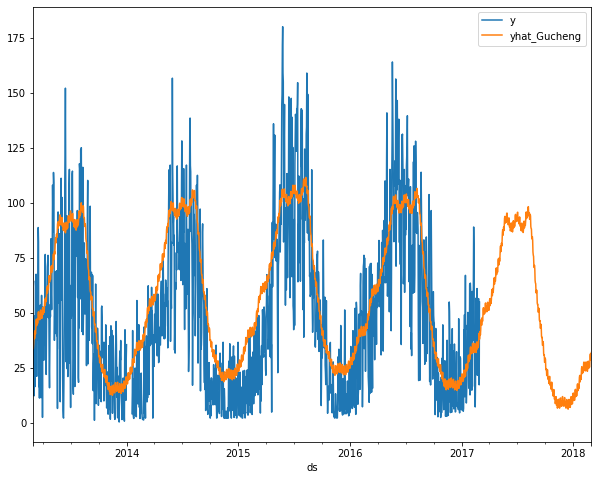

In [38]:
pd.concat([df_final.set_index('ds').query("station=='Wanliu'")['y'],target['yhat_Gucheng']],axis=1).plot()

**The model captures the pattern well**